# ACO for TSP (Travelling Salesman Problem)

In [1]:
import math, random
import matplotlib.pyplot as plt
import numpy as np

In [2]:

# this Function to calculate the length of a given path based on the provided distance matrix.
def cal_dis(dis, path):
    # calculate the length of the path
    length = 0
    for i in range(len(path) - 1):
        length += dis[path[i]][path[i + 1]]
    return length

# this Function implementing a roulette wheel selection mechanism to choose the next city for an ant to visit.
def roulette(pooling):
    sum_num = sum(pooling)
    temp_num = random.random()
    probability = 0
    for i in range(len(pooling)):
        probability += pooling[i] / sum_num
        if probability >= temp_num:
            return i
    return len(pooling)

#  Function to construct a new path for an ant based on the pheromone levels and distances between cities.
def construct_path(dis, pheromone, alpha, beta):
    # construct a new path based on distance and pheromone
    path = [0]
    cur_node = 0
    unvisited_cities = [i for i in range(1, len(dis))]
    for i in range(len(dis) - 1):
        roulette_pooling = []
        for city in unvisited_cities:
            roulette_pooling.append(math.pow(pheromone[cur_node][city], alpha) * math.pow(1 / dis[cur_node][city], beta))
        index = roulette(roulette_pooling)
        cur_node = unvisited_cities[index]
        path.append(cur_node)
        unvisited_cities.pop(index)
    path.append(0)
    return path

def main(coord_x, coord_y, pop, iter, alpha, beta, pho, Q):
    """
    - param coord_x: the x coordinates of cities
    - param coord_y: the y coordinates of cities
    - param pop: the number of ants
    - param iter: the maximum number of iterations
    - param alpha: the importance of pheromone
    - param beta: the importance of heuristic
    - param pho: evaporation rate
    - param Q: the constant
    """
    # Step 1. Initialization of parameters
    city_num = len(coord_x)  # the number of cities
    #dis = [[0 for _ in range(city_num)] for _ in range(city_num)]  # distance matrix
    dis = np.zeros((city_num, city_num))
    # calculate the equlidian distance between two cities
    for i in range(city_num):
        for j in range(i, city_num):
            temp_dis = math.sqrt((coord_x[i] - coord_x[j]) ** 2 + (coord_y[i] - coord_y[j]) ** 2)
            dis[i][j] = temp_dis
            dis[j][i] = temp_dis
    #print(pd.DataFrame(dis))
    
    #pheromone = [[1 for _ in range(city_num)] for _ in range(city_num)]
    pheromone = np.ones((city_num, city_num))
    iter_best = []  # the shortest path of each iteration
    best_path = []
    best_length = 1e6  # 1e6 = 1000000

    # Step 2. Iteration
    for _ in range(iter):

        # Step 2.1. Construct ant solutions
        ant_path = []
        ant_path_length = []
        for i in range(pop):
            new_path = construct_path(dis, pheromone, alpha, beta)
            new_length = cal_dis(dis, new_path)
            ant_path.append(new_path)
            ant_path_length.append(new_length)
        
        # => # Track the best path and its length
        iter_best_path_length = min(ant_path_length)
        if iter_best_path_length < best_length:
            best_length = iter_best_path_length
            best_path = ant_path[ant_path_length.index(iter_best_path_length)]
        iter_best.append(best_length)

        # Step 2.2. Update pheromone (by 2 steps: evaporation and pheromone reinforcement)
        for i in range(city_num):
            for j in range(i, city_num):
                pheromone[i][j] *= (1 - pho)
                pheromone[j][i] *= (1 - pho)
        for i in range(pop):
            delta = Q / ant_path_length[i]
            path = ant_path[i]
            for j in range(city_num):
                pheromone[path[j]][path[j + 1]] += delta
                pheromone[path[j + 1]][path[j]] += delta

    # Step 3. Sort the results
    x = [i for i in range(iter)]
    plt.figure()
    plt.plot(x, iter_best, linewidth=2, color='blue')
    plt.xlabel("Iterations")
    plt.ylabel('Global optimal value')
    plt.show()

    plt.figure()
    plt.scatter(coord_x, coord_y, color='black')
    for i in range(len(best_path) - 1):
        temp_x = [coord_x[best_path[i]], coord_x[best_path[i + 1]]]
        temp_y = [coord_y[best_path[i]], coord_y[best_path[i + 1]]]
        plt.plot(temp_x, temp_y, color='blue')
    plt.show()
    return {'Best tour': best_path, 'Shortest length': best_length}


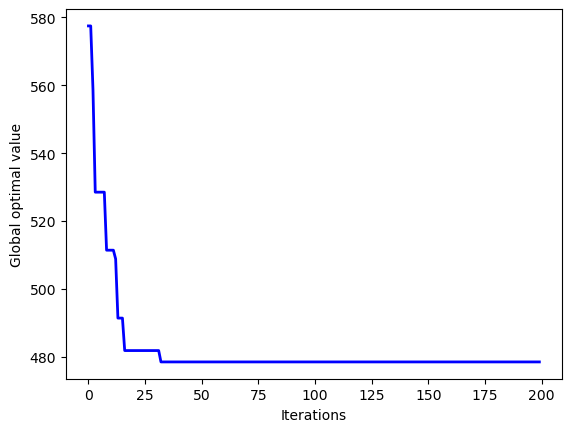

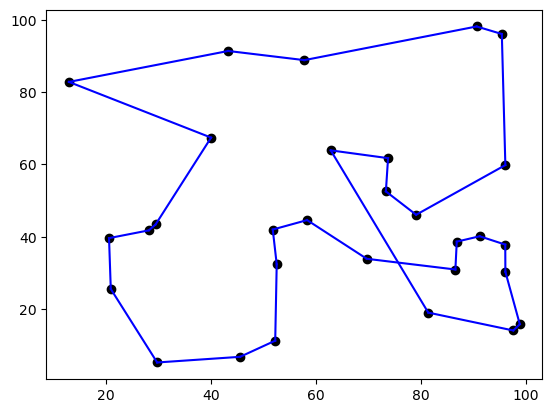

{'Best tour': [0, 8, 25, 29, 1, 22, 28, 5, 7, 10, 9, 17, 15, 24, 2, 27, 23, 19, 11, 20, 12, 26, 18, 14, 4, 13, 6, 3, 21, 16, 0], 'Shortest length': 478.50769675464556}


In [3]:
# Define the parameters
alpha = 1
beta = 5
rho = 0.1
pop = 20
iter = 200
city_num = 30
min_coord = 0
max_coord = 100
coord_x = [random.uniform(min_coord, max_coord) for _ in range(city_num)]
coord_y = [random.uniform(min_coord, max_coord) for _ in range(city_num)]
print(main(coord_x, coord_y, pop, iter, alpha, beta, rho, 10))
